# POS - Part Of Speech

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from collections import Counter
from string import punctuation
from spacy import displacy

In [2]:
def read_spells(read_path,save_path=None):
    df = pd.read_csv(read_path, sep=",")
    df.rename(columns={'Dónde se compró': 'Procedencia', 'Datos adicionales': 'Información'}, inplace=True)
    df.drop(columns=["Otras versiones"],inplace=True)
    df.dropna(subset=['Oración'],inplace=True)
    return df

spells = read_spells("/Users/roicort/Documents/GitHub/HumanidadesDigitales/DarkAnalysis/NLP/corpus.csv")


In [3]:
spells

,Id,Título,Oración,Objeto,Procedencia,Medidas,Información,Voz
6,7,LEGITIMO POLVO DEL ANTIGUO Y MILAGROSO ESPÍRIT...,Espíritu Dominador que dominas en las planos t...,Polvo blanco,Mercado de Catemaco (2008),9 x 6 cm,“Nota: Se hace 9 noches usando dos velas rojas...,mujer
7,8,LEGITIMO POLVO DE SAN ALEJO\n[Ver # 52],"ORACION A SAN ALEJO\nSan Alejo, San Alejo\ntra...",Polvo blanco,Mercado de Catemaco (2008),9 x 6 cm,“Uselo polveándose”,NaN
9,10,ORACIÓN AL ÁNIMA DE LA BASURA,Ánima de la basura (para recuperar extravío va...,Estampa\nCartón plastificado,Mercado Independencia de Morelia (2015),9 x 6 cm,“Se prende con fe una veladora y se deja hasta...,NaN
10,11,ORACION A LA MANO PODEROSA,ORACIÓN A LA MANO PODEROSA\nMano poderosa aquí...,Cartón verde,Mercado Independencia de Morelia (2015),12.5 x 9 cm,“Condiciones: Pedir tres cosas difíciles. Reza...,NaN
11,12,SECRETO Y ORACION “VEN A MI”\n[VER # 71],"Cariño y Amor, esmeralda de Amor,\nardiente p...",Cartón amarillo claro,Mercado Independencia de Morelia (2015),12.5 x 9 cm,“Nota: En una noche tranquila encienda una vel...,hombre o mujer
...,...,...,...,...,...,...,...,...
122,122,LEGITIMO POLVO DE PERRO CAZADOR,Oración: Perro cazador Amigo Fiel hasta la mu...,Polvo gris claro,Mercado Independencia de Morelia (2016),NaN,Legítimo Polvo DEL PERRO CAZADOR Brand ...,NaN
125,125,RELICARIO PIEDRA IMAN,"Yo te pongo Oro para mi tesoro, Plata para mi ...",Polvo gris claro,NaN,NaN,Piedra Imán Fuida [?] piedra iman,NaN
133,133,POLVOS LEGITIMOS DE LA GUADAÑA JUZGADORA,Así como disuelvo y arrojo al viento estos pol...,Polvo gris,Mercado Independencia de Morelia (2016),NaN,LEGITIMO POLVO DE LA GUADAÑA JUZGADORA. Se p...,NaN
134,134,LEGITIMO POLVO San Miguel Arcangel,San Miguel Arcángel como tu eres el encargado ...,Polvo gris claro,Mercado Independencia de Morelia (2016),NaN,LEGITIMO POLVO DE SAN MIGUEL ANRANGEL Riegu...,No venía el polvo!


In [4]:
nlp = spacy.load("es_core_news_md")

In [5]:
text = spells.iloc[12]["Oración"].replace("\n"," ")
print(text)
doc = nlp(text)

En nombre del gran poder de Dios y señor mío, de buena voluntad de Santos Espíritus terrenales y celestiales, ofrezco estos polvos compuestos a juicio y pensamiento contra esa persona o antiguas fuerzas, para que pueda vengarme de mis enemigos, que sea conjurado para el mal vecino. Repítase por tres veces con toda fe. 


In [6]:
tokens = []
for token in doc:
    tokens.append([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,token.shape_, token.is_alpha, token.is_stop])
dft = pd.DataFrame(tokens)
dft.columns=["text", "lemma_", "pos_", "tag_", "dep_","shape_", "is_alpha", "is_stop"]

In [7]:
dft

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
0,En,En,ADP,ADP__AdpType=Prep,case,Xx,True,True
1,nombre,nombrar,INTJ,NOUN,fixed,xxxx,True,False
2,del,del,ADP,ADP__AdpType=Preppron,fixed,xxx,True,True
3,gran,gran,ADJ,ADJ__Number=Sing,amod,xxxx,True,True
4,poder,poder,NOUN,NOUN__Gender=Masc|Number=Sing,obl,xxxx,True,True
5,de,de,ADP,ADP__AdpType=Prep,case,xx,True,True
6,Dios,Dios,PROPN,PROPN,nmod,Xxxx,True,False
7,y,y,CCONJ,CCONJ,cc,x,True,False
8,señor,señor,NOUN,NOUN__Gender=Masc|Number=Sing,conj,xxxx,True,False
9,mío,miar,DET,DET__Gender=Masc|Number=Sing|Number[psor]=Sing...,flat,xxx,True,True


In [8]:
sentence_spans = list(doc.sents)
displacy.render(sentence_spans, style="dep")

In [9]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Dios 28 32 PER
Santos Espíritus 67 83 PER


In [10]:
displacy.render(doc, style="ent",jupyter=True)

In [11]:
# Construyendo un grafo

In [12]:
spells

,Id,Título,Oración,Objeto,Procedencia,Medidas,Información,Voz
6,7,LEGITIMO POLVO DEL ANTIGUO Y MILAGROSO ESPÍRIT...,Espíritu Dominador que dominas en las planos t...,Polvo blanco,Mercado de Catemaco (2008),9 x 6 cm,“Nota: Se hace 9 noches usando dos velas rojas...,mujer
7,8,LEGITIMO POLVO DE SAN ALEJO\n[Ver # 52],"ORACION A SAN ALEJO\nSan Alejo, San Alejo\ntra...",Polvo blanco,Mercado de Catemaco (2008),9 x 6 cm,“Uselo polveándose”,NaN
9,10,ORACIÓN AL ÁNIMA DE LA BASURA,Ánima de la basura (para recuperar extravío va...,Estampa\nCartón plastificado,Mercado Independencia de Morelia (2015),9 x 6 cm,“Se prende con fe una veladora y se deja hasta...,NaN
10,11,ORACION A LA MANO PODEROSA,ORACIÓN A LA MANO PODEROSA\nMano poderosa aquí...,Cartón verde,Mercado Independencia de Morelia (2015),12.5 x 9 cm,“Condiciones: Pedir tres cosas difíciles. Reza...,NaN
11,12,SECRETO Y ORACION “VEN A MI”\n[VER # 71],"Cariño y Amor, esmeralda de Amor,\nardiente p...",Cartón amarillo claro,Mercado Independencia de Morelia (2015),12.5 x 9 cm,“Nota: En una noche tranquila encienda una vel...,hombre o mujer
...,...,...,...,...,...,...,...,...
122,122,LEGITIMO POLVO DE PERRO CAZADOR,Oración: Perro cazador Amigo Fiel hasta la mu...,Polvo gris claro,Mercado Independencia de Morelia (2016),NaN,Legítimo Polvo DEL PERRO CAZADOR Brand ...,NaN
125,125,RELICARIO PIEDRA IMAN,"Yo te pongo Oro para mi tesoro, Plata para mi ...",Polvo gris claro,NaN,NaN,Piedra Imán Fuida [?] piedra iman,NaN
133,133,POLVOS LEGITIMOS DE LA GUADAÑA JUZGADORA,Así como disuelvo y arrojo al viento estos pol...,Polvo gris,Mercado Independencia de Morelia (2016),NaN,LEGITIMO POLVO DE LA GUADAÑA JUZGADORA. Se p...,NaN
134,134,LEGITIMO POLVO San Miguel Arcangel,San Miguel Arcángel como tu eres el encargado ...,Polvo gris claro,Mercado Independencia de Morelia (2016),NaN,LEGITIMO POLVO DE SAN MIGUEL ANRANGEL Riegu...,No venía el polvo!


In [13]:
nlp = spacy.load("es_core_news_md")
import unidecode

In [14]:
entitiesdict = {}
for _, row in spells.iterrows():
    text = row["Oración"].replace("\n"," ")
    #print(text)
    doc = nlp(text)
    entities = [unidecode.unidecode(ent.text.lower().replace("_","")) for ent in doc.ents]
    ID = row["Id"]
    entitiesdict[ID]=entities

In [18]:
admat = pd.DataFrame(columns = entitiesdict.keys(),index=entitiesdict.keys())

import networkx as nx
G = nx.Graph()

for k in entitiesdict.keys():
    for j in entitiesdict.keys():
        if k!=j:
            a = entitiesdict[k]
            b = entitiesdict[j]
            inter = set(a).intersection(set(b))
            admat[k][j] = list(inter)
            if admat[k][j] != []:
                G.add_node(k,ents=a)
                G.add_node(j,ents=b)
                G.add_edge(k,j,weight=len(admat[k][j]))
admat

,7,8,10,11,12,13,13a,14,15,16,...,114,118,119,120,121,122,125,133,134,142
7,NaN,[],[],[],[],[],[espiritu],[],[],[],...,[espiritu],[],[],[],"[espiritu, juan minero]",[],[],[],[],[]
8,[],NaN,[],"[oracion, amen]",[],[],[],[],[oracion],[oracion],...,"[oracion, amen]",[amen],[],[],[],"[oracion, amen]",[],[],[],[]
10,[],[],NaN,[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
11,[],"[oracion, amen]",[],NaN,[],[],[],[],[oracion],[oracion],...,"[oracion, amen]",[amen],[],[],[],"[oracion, amen]",[],[],[],[]
12,[],[],[],[],NaN,[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,[],"[oracion, amen]",[],"[oracion, amen]",[],[],[],[],[oracion],[oracion],...,"[oracion, amen]",[amen],[],[],[],NaN,[],[],[],[]
125,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],NaN,[],[],[]
133,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[guadana juzgadora],[],[],[],NaN,[],[]
134,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],NaN,[]


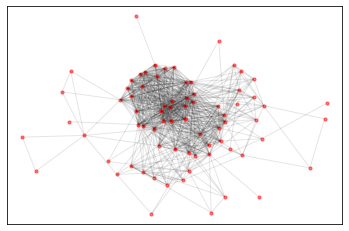

In [19]:

pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_nodes(G,pos,node_size=10,node_color="red",alpha=0.5)
nx.draw_networkx_edges(G,pos,edge_color="black",alpha=0.1)

plt.show()

In [25]:

import networkx.algorithms.community as nxcom
from wordcloud import WordCloud

communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
print(len(communities))

4


In [27]:
for c in communities:
    #print(c)
    biglist = []
    for e in list(c):
        biglist=set(G.nodes[e]["ents"]).intersection(set(biglist))
    unique_string=(" ").join(biglist)
    print(unique_string)
    wordcloud = WordCloud(width = 2560, height = 1600,background_color ='white', min_font_size = 10).generate(unique_string) 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 


frozenset({'66', '121', '23', '81', '27', '93', '8', '106', '38', '97', '52', '11', '15', '91', '103', '84', '85', '76', '13', '107', '64', '95', '13a', '32', '109', '102', '122', '73', '114', '105', '16', '17', '7'})



ValueError: We need at least 1 word to plot a word cloud, got 0.